In [10]:
from scipy import stats
from scipy.stats import norm
import numpy as np

In [11]:
vib1 = norm.rvs(5, 2, 100)

In [12]:
print("Выборка 1:  Среднее {}, Оценка дисперсии {}, Оценка с.к.о {}".format(np.mean(vib1),np.var(vib1),np.std(vib1)))

Выборка 1:  Среднее 5.383347619701745, Оценка дисперсии 4.140592762522651, Оценка с.к.о 2.034844653167079


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

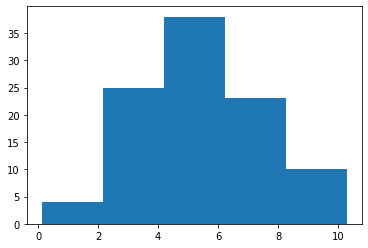

In [154]:
fig, ax = plt.subplots()

# гистограмма
n5, bins5, patches5 = ax.hist(vib1, 5)


#fig.tight_layout()
plt.show()

In [155]:
n5

array([ 4., 25., 38., 23., 10.])

In [156]:
bins5

array([ 0.13778063,  2.16502352,  4.19226641,  6.2195093 ,  8.24675218,
       10.27399507])

In [157]:
stats.norm.cdf(bins5[5], loc = np.mean(vib1), scale = np.std(vib1))

0.991879406853149

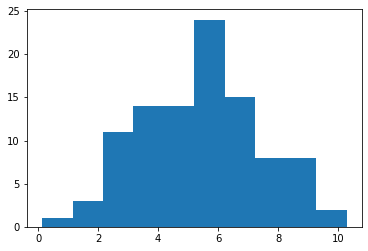

In [158]:
fig, ax = plt.subplots()

# гистограмма
n10, bins10, patches10 = ax.hist(vib1, 10)


#fig.tight_layout()
plt.show()

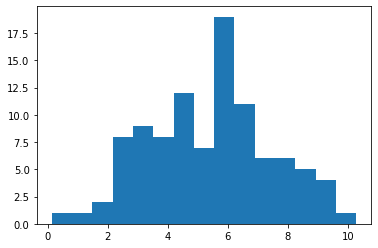

In [159]:
fig, ax = plt.subplots()

# гистограмма
n15, bins15, patches15 = ax.hist(vib1, 15)


#fig.tight_layout()
plt.show()

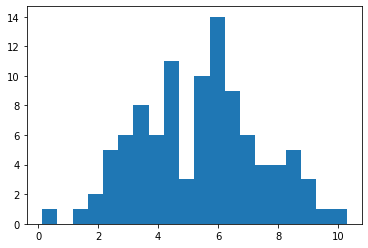

In [160]:
fig, ax = plt.subplots()

# гистограмма
n20, bins20, patches20 = ax.hist(vib1, 20)


#fig.tight_layout()
plt.show()

In [161]:
#3. Критерий хи-квадрат

def chisquare_test_norm(vib, n, bins):
    sum0 = 0
    prob = []
    i = 0
    while i < len(bins)-1:
        prob.append(stats.norm.cdf(bins[i+1], loc = np.mean(vib), scale = np.std(vib)) - stats.norm.cdf(bins[i], loc = np.mean(vib), scale = np.std(vib)))
        i += 1
    for i in range (len(n)):
        sum0 += (np.power((n[i] - len(vib)*prob[i]),2))/(len(vib)*prob[i]) 
    return sum0
        
def chisquare_test_uniform(vib, n, bins):
    sum0 = 0
    prob = []
    i = 0
    while i < len(bins)-1:
        # prob.append(stats.uniform.cdf(bins[i+1], loc = np.mean(vib) - np.power(3*np.std(vib),1/2), scale = np.mean(vib) + np.power(3*np.std(vib),1/2)) - stats.uniform.cdf(bins[i], loc = np.mean(vib) - np.power(3*np.std(vib),1/2), scale = np.mean(vib) + np.power(3*np.std(vib),1/2)))
        prob.append(stats.uniform.cdf(bins[i+1], loc = np.mean(vib), scale = np.std(vib)) - stats.uniform.cdf(bins[i], loc = np.mean(vib), scale = np.std(vib)))
        i += 1
   # new_n = n
    #new_bins = []
    #for i in range(len(n)):
     #   if (len(vib)*prob[i] < 5):
      #      new_n[i] = n[i] + n[i+1]
       #     del new_n[i+1]
        #    new_bins.append()
    for i in range (len(n)):
        sum0 += (np.power((n[i] - len(vib)*prob[i]),2))/(len(vib)*(prob[i])) 
    return sum0  

def chisquare_test_chi2(vib, n, bins):
    sum0 = 0
    prob = []
    i = 0
    while i < len(bins)-1:
        prob.append(stats.chi2.cdf(bins[i+1], 5) - stats.chi2.cdf(bins[i], 5))
        i += 1
    for i in range (len(n)):
        sum0 += (np.power((n[i] - len(vib)*prob[i]),2))/(len(vib)*prob[i]) 
    return sum0

In [162]:
#находим выборочное значение
print("1. выбор-е зн-е: {} ".format(chisquare_test_norm(vib1, n5, bins5)))
print("2. выбор-е зн-е: {} ".format(chisquare_test_norm(vib1, n10, bins10)))
print("2. выбор-е зн-е: {} ".format(chisquare_test_norm(vib1, n15, bins15)))
print("2. выбор-е зн-е: {} ".format(chisquare_test_norm(vib1, n20, bins20)))

1. выбор-е зн-е: 2.113541969004764 
2. выбор-е зн-е: 5.548750407233358 
2. выбор-е зн-е: 11.895743292215727 
2. выбор-е зн-е: 13.308588396943701 


In [163]:
print("1. p = {}".format(1 - stats.chi2.cdf(chisquare_test_norm(vib1, n5, bins5), 2)))
print("1. p = {}".format(1 - stats.chi2.cdf(chisquare_test_norm(vib1, n10, bins10), 7)))
print("1. p = {}".format(1 - stats.chi2.cdf(chisquare_test_norm(vib1, n15, bins15), 12)))
print("1. p = {}".format(1 - stats.chi2.cdf(chisquare_test_norm(vib1, n20, bins20), 17)))

1. p = 0.3475763296243414
1. p = 0.5933103471316414
1. p = 0.4540886071061251
1. p = 0.71529536934301


In [164]:
#находим выборочное значение
print("1. выбор-е зн-е: {} ".format(chisquare_test_uniform(vib1, n5, bins5)))
print("2. выбор-е зн-е: {} ".format(chisquare_test_uniform(vib1, n10, bins10)))
print("2. выбор-е зн-е: {} ".format(chisquare_test_uniform(vib1, n15, bins15)))
print("2. выбор-е зн-е: {} ".format(chisquare_test_uniform(vib1, n20, bins20)))

1. выбор-е зн-е: inf 
2. выбор-е зн-е: inf 
2. выбор-е зн-е: inf 
2. выбор-е зн-е: nan 


C:\Users\happy\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\happy\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


In [165]:
#находим выборочное значение
print("1. выбор-е зн-е: {} ".format(chisquare_test_chi2(vib1, n5, bins5)))
print("2. выбор-е зн-е: {} ".format(chisquare_test_chi2(vib1, n10, bins10)))
print("2. выбор-е зн-е: {} ".format(chisquare_test_chi2(vib1, n15, bins15)))
print("2. выбор-е зн-е: {} ".format(chisquare_test_chi2(vib1, n20, bins20)))

1. выбор-е зн-е: 26.151032648717482 
2. выбор-е зн-е: 38.37613600275025 
2. выбор-е зн-е: 43.70867631805496 
2. выбор-е зн-е: 47.07952831017843 


In [166]:
print("1. p = {}".format(1 - stats.chi2.cdf(chisquare_test_chi2(vib1, n5, bins5), 4)))
print("1. p = {}".format(1 - stats.chi2.cdf(chisquare_test_chi2(vib1, n10, bins10), 9)))
print("1. p = {}".format(1 - stats.chi2.cdf(chisquare_test_chi2(vib1, n15, bins15), 14)))
print("1. p = {}".format(1 - stats.chi2.cdf(chisquare_test_chi2(vib1, n20, bins20), 19)))

1. p = 2.9501204433013406e-05
1. p = 1.4920629570536192e-05
1. p = 6.594719938413096e-05
1. p = 0.00034793310627234675


In [167]:
prob5 = []
i = 0
while i < len(bins5)-1:
    # prob.append(stats.uniform.cdf(bins[i+1], loc = np.mean(vib) - np.power(3*np.std(vib),1/2), scale = np.mean(vib) + np.power(3*np.std(vib),1/2)) - stats.uniform.cdf(bins[i], loc = np.mean(vib) - np.power(3*np.std(vib),1/2), scale = np.mean(vib) + np.power(3*np.std(vib),1/2)))
    prob5.append(stats.uniform.cdf(bins5[i+1], loc = np.mean(vib1), scale = np.std(vib1)) - stats.uniform.cdf(bins5[i], loc = np.mean(vib1), scale = np.std(vib1)))
    i += 1

In [168]:
prob5

[0.0, 0.0, 0.41092162713561486, 0.5890783728643851, 0.0]

In [169]:
for i in range(len(n5)):
    print(i)
    

0
1
2
3
4


In [170]:
def chisquare_test_uniform(vib, n, bins):
    sum0 = 0
    prob = []
    i = 0
    while i < len(bins)-1:
        # prob.append(stats.uniform.cdf(bins[i+1], loc = np.mean(vib) - np.power(3*np.std(vib),1/2), scale = np.mean(vib) + np.power(3*np.std(vib),1/2)) - stats.uniform.cdf(bins[i], loc = np.mean(vib) - np.power(3*np.std(vib),1/2), scale = np.mean(vib) + np.power(3*np.std(vib),1/2)))
        prob.append(stats.uniform.cdf(bins[i+1], loc = np.mean(vib), scale = np.std(vib)) - stats.uniform.cdf(bins[i], loc = np.mean(vib), scale = np.std(vib)))
        i += 1
    
    for i in range (len(n)):
        sum0 += (np.power((n[i] - len(vib)*prob[i]),2))/(len(vib)*(prob[i])) 
    return sum0 

In [171]:
#4 Критерий Колмогорова


In [172]:
n5

array([ 4., 25., 38., 23., 10.])

In [173]:
bins5

array([ 0.13778063,  2.16502352,  4.19226641,  6.2195093 ,  8.24675218,
       10.27399507])

In [177]:
new_n = []
new_n = list(n5)
new_bins = []
for i in range(len(n5)-1):
    if (len(vib1)*prob5[i] < 5):
        new_n[i] = n5[i] + n5[i+1]
        del new_n[i+1]

In [178]:
new_n

[29.0, 63.0, 10.0]

In [179]:
n5

array([ 4., 25., 38., 23., 10.])